In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/loan_data.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
print(df['purpose'].value_counts())

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


In [7]:
#Detect Missing Values
df.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [8]:
##One Hot Encoding
df['purpose']=df['purpose'].astype(str)
df_encoded=pd.get_dummies(df,columns=['purpose'],prefix=['purpose'],drop_first=True)
# Convert boolean columns to 0 and 1
df_encoded = df_encoded.astype(int)
df_encoded['log.annual.inc']=np.exp(df_encoded['log.annual.inc'])

In [9]:
df_encoded.head(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,829,59874.141715,19,737,5639,28854,52,0,0,0,0,0,1,0,0,0,0
1,1,0,228,59874.141715,14,707,2760,33623,76,0,0,0,0,1,0,0,0,0,0
2,1,0,366,22026.465795,11,682,4710,3511,25,1,0,0,0,0,1,0,0,0,0
3,1,0,162,59874.141715,8,712,2699,33667,73,1,0,0,0,0,1,0,0,0,0
4,1,0,102,59874.141715,14,667,4066,4740,39,0,1,0,0,1,0,0,0,0,0
5,1,0,125,59874.141715,16,727,6120,50807,51,0,0,0,0,1,0,0,0,0,0
6,1,0,194,22026.465795,4,667,3180,3839,76,0,0,1,1,0,1,0,0,0,0
7,1,0,131,59874.141715,11,722,5116,24220,68,0,0,0,1,0,0,0,0,0,0
8,1,0,87,59874.141715,17,682,3989,69909,51,1,0,0,0,0,0,0,1,0,0
9,1,0,84,22026.465795,10,707,2730,5630,23,1,0,0,0,0,1,0,0,0,0


In [10]:
#Distribution of fully Paid(0) vs not fully paid(1)
distribution = df_encoded['not.fully.paid'].value_counts(normalize=True) * 100
distribution
##83 % of loans were fully paid
##16 % were not fully paid

,proportion
not.fully.paid,
0,83.994571
1,16.005429


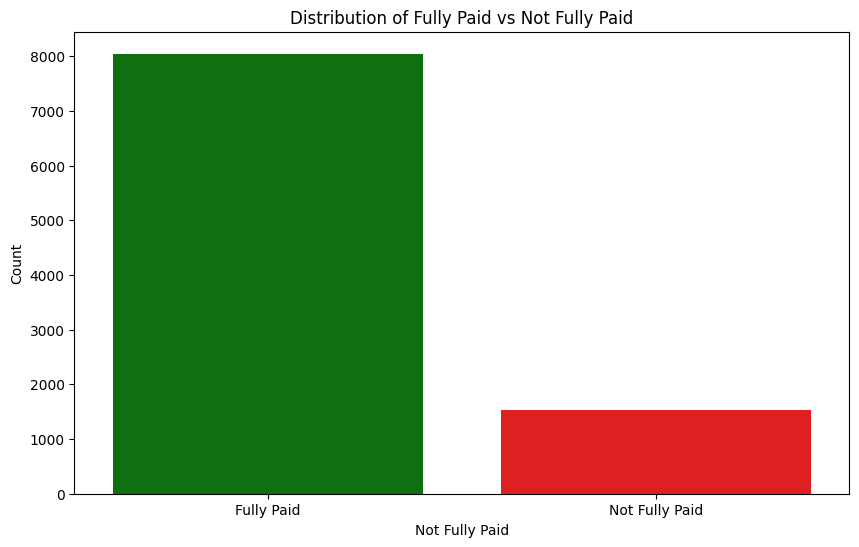

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='not.fully.paid',data=df_encoded,palette=['green', 'red'])
sns.set_style('whitegrid')
plt.title('Distribution of Fully Paid vs Not Fully Paid')
plt.xlabel('Not Fully Paid')
plt.ylabel('Count')
plt.xticks(range(2),['Fully Paid','Not Fully Paid'])
plt.show()

#Dataset is highly imbalanced

In [12]:
#Separate majority and minority class
df_majority = df_encoded[df_encoded['not.fully.paid']==0]
df_minority = df_encoded[df_encoded['not.fully.paid']==1]

In [13]:
df_minority_oversampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [14]:
oversampled_data = pd.concat([df_majority,df_minority_oversampled],axis=0)

In [15]:
oversampled_data['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,8045


<Axes: xlabel='not.fully.paid', ylabel='count'>

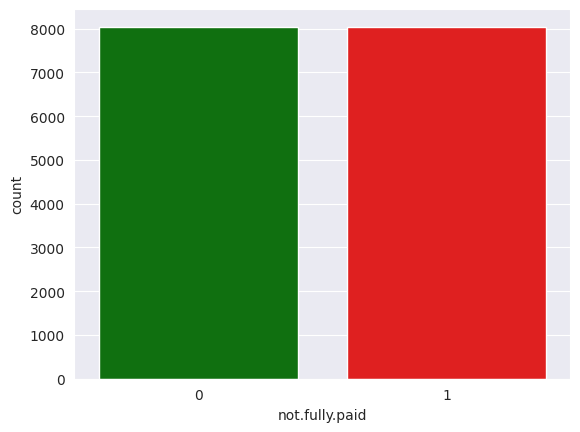

In [16]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid',data=oversampled_data,palette=['green','red'])

In [17]:
df_encoded['credit.policy'].value_counts()

,count
credit.policy,
1,7710
0,1868


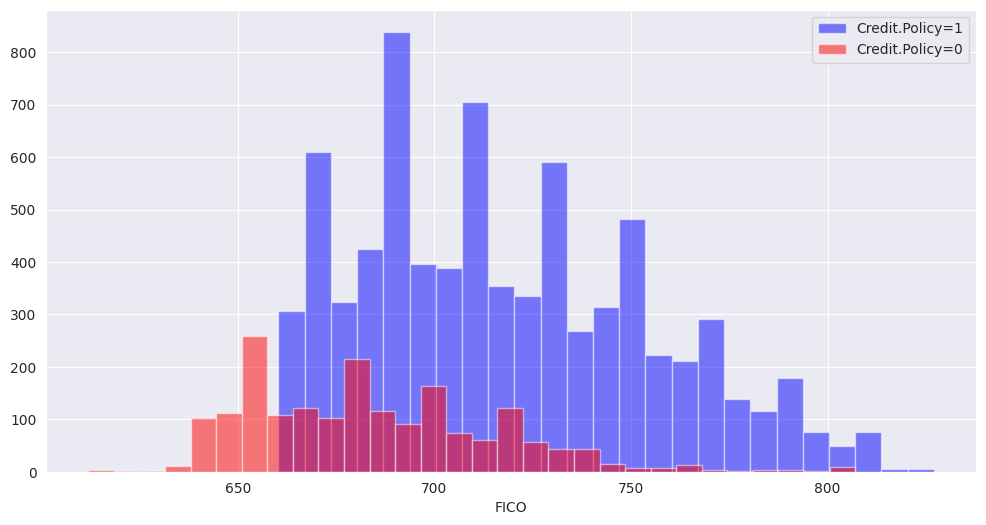

In [18]:
##Histogram of FICO distribution over credit.policy outcome
plt.figure(figsize=(12,6))
df_encoded[df_encoded['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df_encoded[df_encoded['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

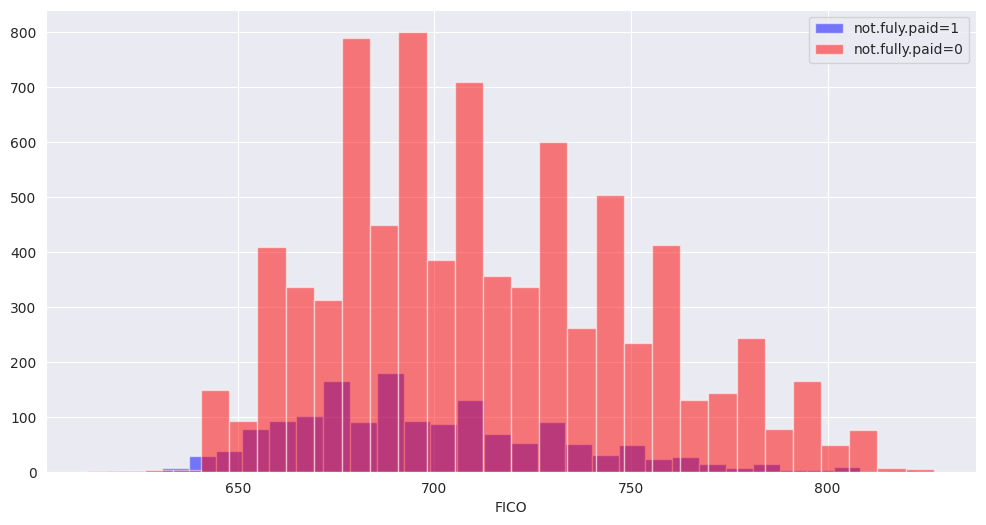

In [19]:
##Histogram of FICO distribution over not.fully.paid
plt.figure(figsize=(12,6))
df_encoded[df_encoded['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fuly.paid=1')
df_encoded[df_encoded['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

<Axes: xlabel='purpose', ylabel='count'>

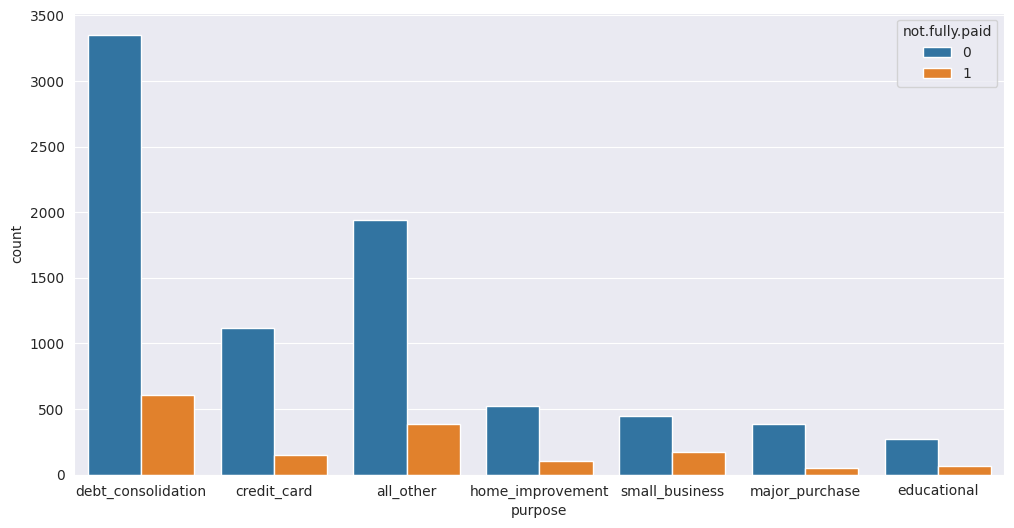

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

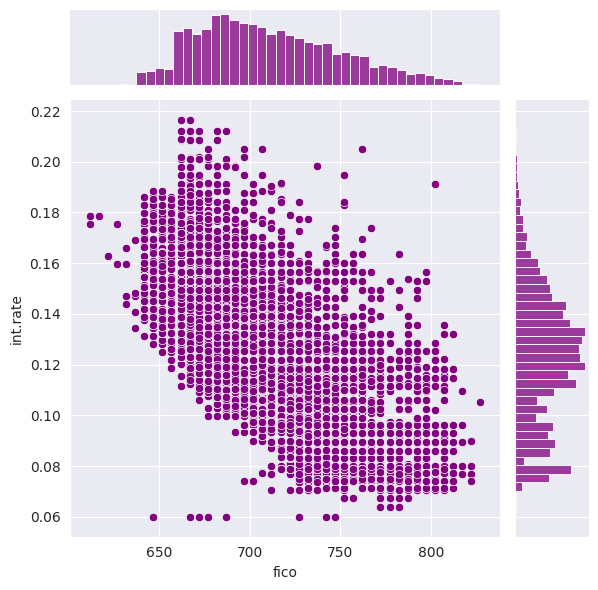

In [21]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')
## Higher FICO Rate - lower interest rate - negative correlation
##FICO definition - higher the FICO score, more likely a borrower will repay their debts on time


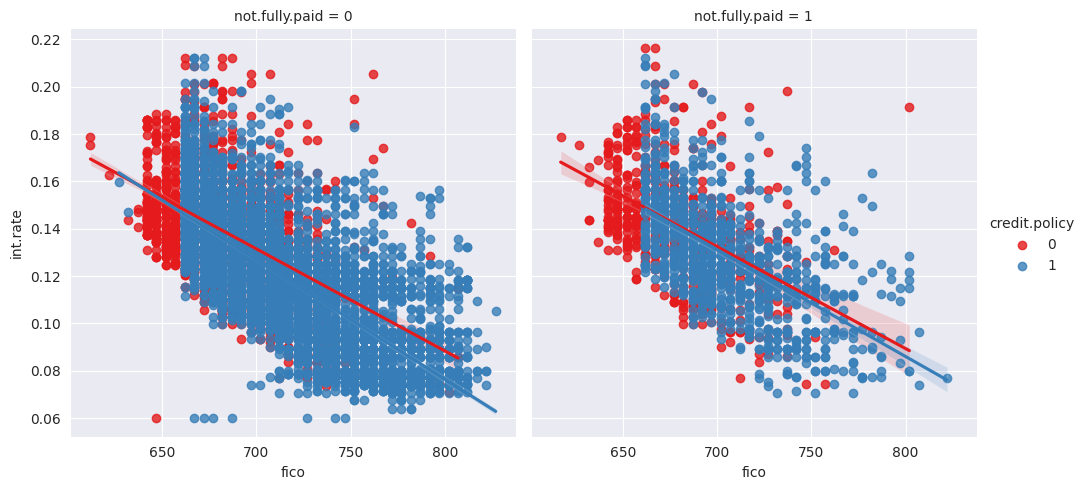

In [22]:
##Compare trend between credit policy and not.fully.paid - regression analysis of relationship between fico(credit score) and interest rate
##split by target variable not.fully.paid
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

##Observations/Findings
## Negative correlatio between int.rate and fico
## As fico increases, int.rate decreases (expected as higher credit scores typically result in lower interest rates)
## Red points / credit policy 0 are loans that did not meet lending credit policy and are concentrated in higher int.rate and lower fico range
## Blue points / credit policy 1 are loans that meet lending credit policy and are concentrated in lower int.rate and higher fico range

In [23]:
df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   int64  
 2   installment                 9578 non-null   int64  
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   int64  
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   int64  
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   int64  
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [24]:
df_encoded.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,NaN,0.058768,-0.008145,-0.091507,0.348319,0.099027,-0.187518,-0.104335,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.058768,NaN,1.000000,0.282969,0.048645,0.086067,0.183319,0.233635,0.081187,-0.010401,-0.004357,-0.032760,0.049933,0.000768,0.161658,-0.094511,0.023054,-0.079816,0.145600
log.annual.inc,-0.008145,NaN,0.282969,1.000000,-0.103409,0.076627,0.191307,0.316391,0.011370,0.035570,0.015747,0.005332,-0.001590,0.031551,-0.046116,-0.054458,0.085129,0.001199,0.068545
dti,-0.091507,NaN,0.048645,-0.103409,1.000000,-0.240875,0.059205,0.188525,0.335481,0.029106,-0.022113,0.006697,0.037668,0.083975,0.178561,-0.034936,-0.093375,-0.077903,-0.069300
fico,0.348319,NaN,0.086067,0.076627,-0.240875,1.000000,0.263879,-0.015553,-0.541588,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099027,NaN,0.183319,0.191307,0.059205,0.263879,1.000000,0.229346,-0.024399,-0.041737,0.081372,0.071829,-0.029237,0.046219,-0.009316,-0.042623,0.068084,-0.020562,0.034883
revol.bal,-0.187518,NaN,0.233635,0.316391,0.188525,-0.015553,0.229346,1.000000,0.203786,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104335,NaN,0.081187,0.011370,0.335481,-0.541588,-0.024399,0.203786,1.000000,-0.013870,-0.042535,0.066682,0.082030,0.091358,0.211720,-0.053066,-0.114561,-0.107911,-0.060928
inq.last.6mths,-0.535511,NaN,-0.010401,0.035570,0.029106,-0.185293,-0.041737,0.022394,-0.013870,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


<Axes: >

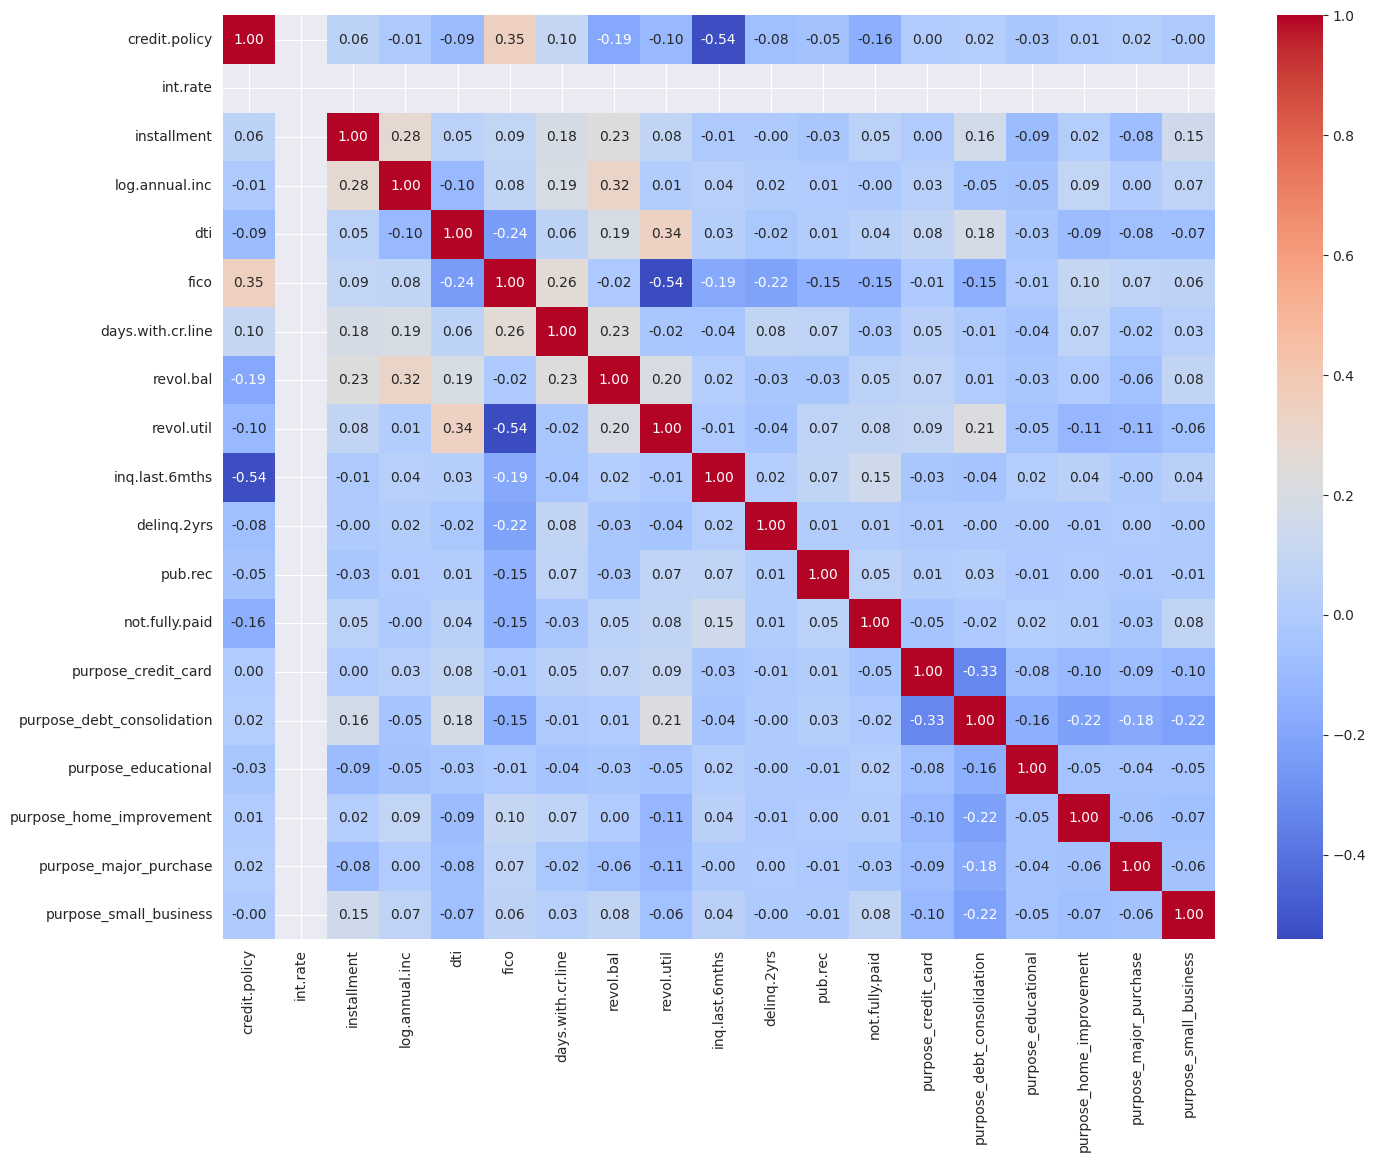

In [25]:
plt.figure(figsize=(16,12))
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm',fmt=".2f")

#Revol.util and int.rate have 0.46 correlation which is moderate , I am dropping revol.util
# Correlation > 0.8 or < -0.8: Consider dropping one of the features in highly correlated pairs.
# int.rate and fico are negatively correlated -0.71, dropping int.rate as fico is important for credit scoring
# inq.last.6mths and credit.policy: negatively correlated -0.54

In [26]:
df_encoded.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [27]:
to_drop_cols=['revol.bal','int.rate','inq.last.6mths']

In [28]:
df_encoded.drop(to_drop_cols,axis=1,inplace=True)

In [29]:
df_encoded.head()

,credit.policy,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,829,59874.141715,19,737,5639,52,0,0,0,0,1,0,0,0,0
1,1,228,59874.141715,14,707,2760,76,0,0,0,1,0,0,0,0,0
2,1,366,22026.465795,11,682,4710,25,0,0,0,0,1,0,0,0,0
3,1,162,59874.141715,8,712,2699,73,0,0,0,0,1,0,0,0,0
4,1,102,59874.141715,14,667,4066,39,1,0,0,1,0,0,0,0,0


In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   installment                 9578 non-null   int64  
 2   log.annual.inc              9578 non-null   float64
 3   dti                         9578 non-null   int64  
 4   fico                        9578 non-null   int64  
 5   days.with.cr.line           9578 non-null   int64  
 6   revol.util                  9578 non-null   int64  
 7   delinq.2yrs                 9578 non-null   int64  
 8   pub.rec                     9578 non-null   int64  
 9   not.fully.paid              9578 non-null   int64  
 10  purpose_credit_card         9578 non-null   int64  
 11  purpose_debt_consolidation  9578 non-null   int64  
 12  purpose_educational         9578 non-null   int64  
 13  purpose_home_improvement    9578 

In [31]:
X = df_encoded.drop('not.fully.paid',axis=1)
y = df_encoded['not.fully.paid']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
X_train.shape[1]
print("num of features:",X_train.shape[1])

num of features: 15


In [33]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
model = Sequential()
model.add(Dense(512,input_dim=X_train.shape[1],activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,617 (686.00 KB)

 Trainable params: 174,081 (680.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [35]:
# mdl_history = model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),validation_split=0.25)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
mdl_history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7992 - loss: 0.5071 - val_accuracy: 0.8379 - val_loss: 0.4404
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8374 - loss: 0.4353 - val_accuracy: 0.8379 - val_loss: 0.4263
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8305 - loss: 0.4493 - val_accuracy: 0.8365 - val_loss: 0.4303
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8329 - loss: 0.4348 - val_accuracy: 0.8372 - val_loss: 0.4314
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8422 - loss: 0.4207 - val_accuracy: 0.8351 - val_loss: 0.4230
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8422 - loss: 0.4222 - val_accuracy: 0.8365 - val_loss: 0.4228
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8450 - loss: 0.4138 - val_accuracy: 0.8330 - val_loss: 0.4285
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8315 - loss: 0.4298 - val_a

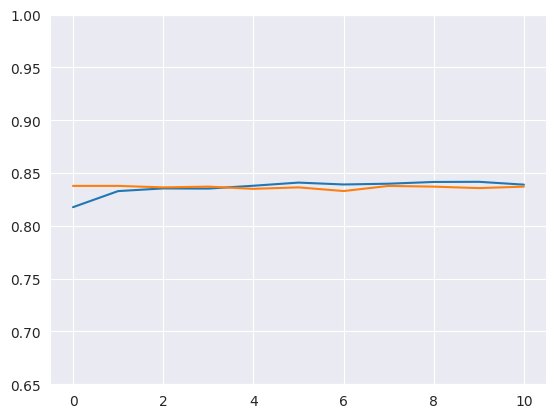

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8432 - loss: 0.4109
Accuracy: 83.65


In [36]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.ylim(0.65,1)
plt.show()
_,accuracy = model.evaluate(X_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [37]:
 y_pred=model.predict(X_test)

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [38]:
y_pred=np.round(y_pred)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [39]:
y_test

,not.fully.paid
8558,0
4629,0
1383,1
8142,0
1768,0
...,...
8688,0
981,0
6318,0
1407,0


In [40]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2379   29]
 [ 441   25]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.46      0.05      0.10       466

    accuracy                           0.84      2874
   macro avg       0.65      0.52      0.50      2874
weighted avg       0.78      0.84      0.78      2874



In [41]:
model1 = Sequential()
model1.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model1.add(BatchNormalization())  # Batch normalization
model1.add(Dropout(0.4))
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())  # Batch normalization
model1.add(Dropout(0.4))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()


#Compile model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [42]:
mdl_history1 = model1.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),validation_split=0.25,verbose=2)

Epoch 1/50
210/210 - 3s - 16ms/step - accuracy: 0.8223 - loss: 0.4781 - val_accuracy: 0.8379 - val_loss: 0.4400
Epoch 2/50
210/210 - 1s - 3ms/step - accuracy: 0.8350 - loss: 0.4468 - val_accuracy: 0.8379 - val_loss: 0.4345
Epoch 3/50
210/210 - 1s - 6ms/step - accuracy: 0.8373 - loss: 0.4399 - val_accuracy: 0.8347 - val_loss: 0.4246
Epoch 4/50
210/210 - 1s - 3ms/step - accuracy: 0.8391 - loss: 0.4348 - val_accuracy: 0.8281 - val_loss: 0.4283
Epoch 5/50
210/210 - 1s - 6ms/step - accuracy: 0.8398 - loss: 0.4295 - val_accuracy: 0.8170 - val_loss: 0.4364
Epoch 6/50
210/210 - 1s - 6ms/step - accuracy: 0.8383 - loss: 0.4252 - val_accuracy: 0.8344 - val_loss: 0.4212
Epoch 7/50
210/210 - 1s - 6ms/step - accuracy: 0.8388 - loss: 0.4252 - val_accuracy: 0.8375 - val_loss: 0.4231
Epoch 8/50
210/210 - 1s - 4ms/step - accuracy: 0.8405 - loss: 0.4239 - val_accuracy: 0.8288 - val_loss: 0.4258
Epoch 9/50
210/210 - 1s - 6ms/step - accuracy: 0.8411 - loss: 0.4222 - val_accuracy: 0.8330 - val_loss: 0.4203


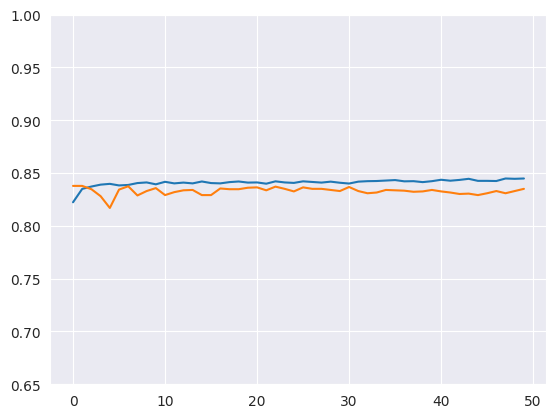

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8440 - loss: 0.4121
Accuracy: 83.51


In [43]:
plt.plot(mdl_history1.history['accuracy'])
plt.plot(mdl_history1.history['val_accuracy'])
plt.ylim(0.65,1)
plt.show()
_,accuracy = model1.evaluate(X_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [44]:
y_pred=model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.44      0.06      0.11       466

    accuracy                           0.84      2874
   macro avg       0.64      0.52      0.51      2874
weighted avg       0.78      0.84      0.78      2874



In [45]:
from keras.regularizers import l2

model2 = Sequential()
model2.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model2.add(BatchNormalization())  # Batch normalization
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model2.add(BatchNormalization())  # Batch normalization
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,617 (686.00 KB)

 Trainable params: 174,081 (680.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [46]:
model2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
# early_stopping = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
# mdl_history2 = model2.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     batch_size=64,
#     epochs=50,
#     callbacks=[early_stopping],
#     verbose=1,
# )
# early_stopping = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
mdl_history2 = model2.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),validation_split=0.25,verbose=1)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7997 - loss: 2.9707 - val_accuracy: 0.8379 - val_loss: 1.0709
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8234 - loss: 0.9408 - val_accuracy: 0.8379 - val_loss: 0.6168
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8407 - loss: 0.5884 - val_accuracy: 0.8379 - val_loss: 0.5332
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8291 - loss: 0.5348 - val_accuracy: 0.8379 - val_loss: 0.4974
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8356 - loss: 0.4969 - val_accuracy: 0.8382 - val_loss: 0.4802
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8346 - loss: 0.4879 - val_accuracy: 0.8344 - val_loss: 0.4702
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8387 - loss: 0.4654 - val_accuracy: 0.8379 - val_loss: 0.4578
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8432 - loss: 0.4557 - val_ac

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy Score: 83.79%


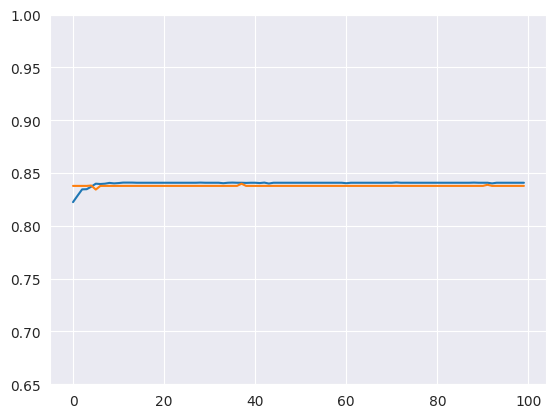

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8473 - loss: 0.4057
Accuracy: 83.79


In [48]:
# Get model predictions (probabilities)
predictions = model2.predict(X_test)

# Convert probabilities to binary labels (threshold at 0.5)
predicted_classes = (predictions > 0.5).astype("int32")

# Calculate the accuracy by comparing predicted and actual labels
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_classes)

# Print the accuracy
print(f"Accuracy Score: {accuracy * 100:.2f}%")

plt.plot(mdl_history2.history['accuracy'])
plt.plot(mdl_history2.history['val_accuracy'])
plt.ylim(0.65,1)
plt.show()
_,accuracy = model2.evaluate(X_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
plt.plot(mdl_history2.history['binary_accuracy'])
plt.plot(mdl_history2.history['val_binary_accuracy'])
plt.ylim(0.65,1)
plt.show()
_,accuracy = model2.evaluate(X_test,y_test)
# Print the accuracy
print(f"Accuracy Score: {accuracy * 100:.2f}%")

In [ ]:
#First model had best accuracy

In [ ]:
#!pip install --upgrade tensorflow
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model-building function
def create_model(optimizer='adam', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier (or KerasRegressor for regression tasks)
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters grid
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Parameters: {grid_result.best_params_}")
